# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
205,2023-11-06,28,27,19,70.370370,29.629630,147.0840,medium,2023-11-06
206,2023-11-07,25,23,21,91.304348,8.695652,52.7160,easy,2023-11-07
207,2023-11-08,22,21,16,76.190476,23.809524,57.1720,easy,2023-11-08
208,2023-11-09,22,21,18,85.714286,14.285714,198.7190,medium,2023-11-09


How many people are playing Reflect?

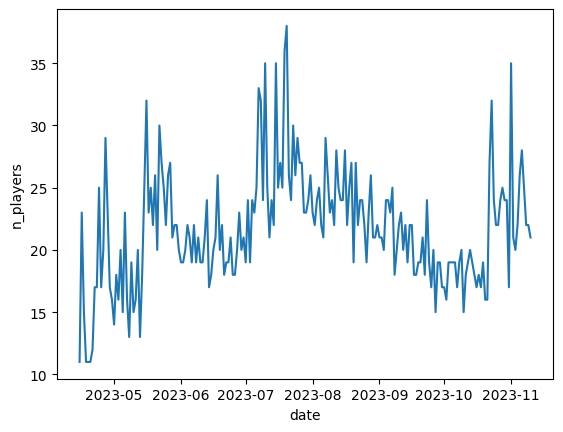

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

464

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2023-11-06,28,27,19,70.370370,29.629630,147.0840,medium,2023-11-06,puzzle-2023-11-06.txt,...,4.000000,8,28,0,0,2,1,10,4,57.6
206,2023-11-07,25,23,21,91.304348,8.695652,52.7160,easy,2023-11-07,puzzle-2023-11-07.txt,...,4.333333,8,26,4,0,2,1,9,4,36.3
207,2023-11-08,22,21,16,76.190476,23.809524,57.1720,easy,2023-11-08,puzzle-2023-11-08.txt,...,4.166667,8,25,6,0,2,1,9,4,37.2
208,2023-11-09,22,21,18,85.714286,14.285714,198.7190,medium,2023-11-09,puzzle-2023-11-09.txt,...,4.800000,8,24,6,0,2,1,10,4,68.7


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

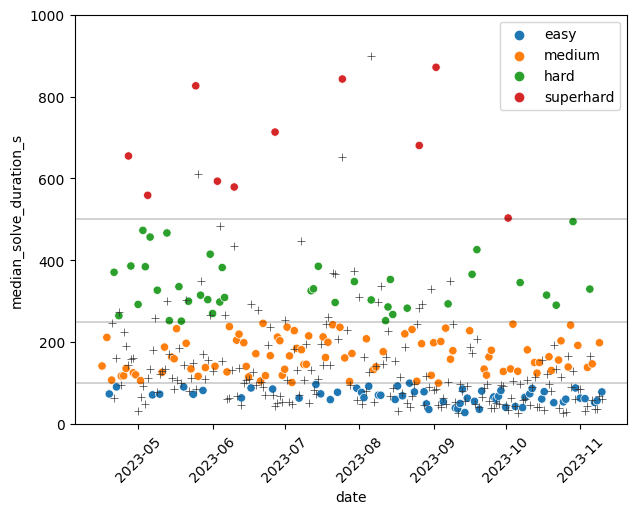

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

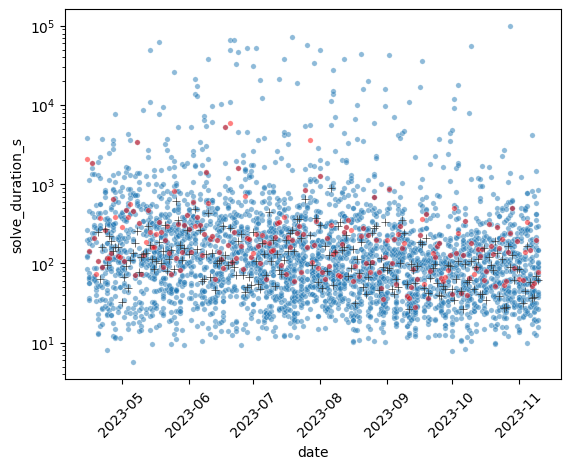

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

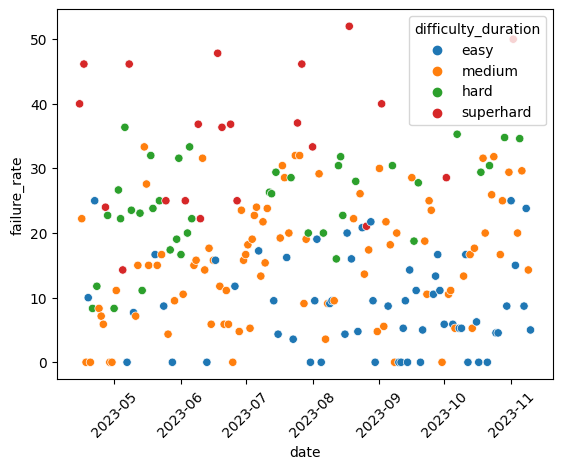

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.516746,0.073745,0.053294,0.123359,0.072526,-0.024860,0.112054,0.018240,0.089299,0.091784,0.084988,-0.031762,0.093410,0.199767,0.161007,0.187560,0.154880
failure_rate,0.516746,1.000000,0.136072,0.088127,0.107401,0.072708,0.036322,0.180083,0.041498,0.079063,0.106513,0.067036,-0.082434,0.154949,0.093996,0.263743,0.205047,0.154798
total_beam_distance,0.199767,0.093996,0.143824,0.110695,0.455116,0.301954,-0.231135,0.125975,0.061109,0.291158,-0.030837,0.397095,0.111170,0.329364,1.000000,0.278557,0.106906,0.021882
excess_reflections,0.187560,0.205047,0.324075,-0.408701,-0.285334,0.578866,0.481864,0.521083,-0.136638,-0.133482,-0.271368,0.355131,0.335781,0.175833,0.106906,0.133116,1.000000,0.782051
excess_beam_distance,0.161007,0.263743,-0.163667,-0.296703,-0.169728,0.257869,0.088034,0.253128,-0.139565,-0.025086,-0.273110,0.278273,0.345733,0.692415,0.278557,1.000000,0.133116,0.022036
num_excess_reflection_beams,0.154880,0.154798,0.270959,-0.197356,-0.169521,0.405641,0.436224,0.177959,0.052898,0.026137,-0.000946,0.258865,0.141311,-0.009461,0.021882,0.022036,0.782051,1.000000
num_beams,0.123359,0.107401,-0.012614,0.813038,1.000000,-0.211324,-0.583998,-0.161247,0.185985,0.784615,0.622337,0.192554,-0.808346,-0.194520,0.455116,-0.169728,-0.285334,-0.169521
max_blocks_per_beam,0.112054,0.180083,0.148461,-0.312109,-0.161247,0.460342,0.343395,1.000000,-0.250357,0.015211,-0.150682,0.339749,0.217441,0.307250,0.125975,0.253128,0.521083,0.177959
max_beam_distance,0.093410,0.154949,-0.103097,-0.267975,-0.194520,0.171087,-0.004251,0.307250,-0.253243,-0.170279,-0.344819,0.172073,0.399627,1.000000,0.329364,0.692415,0.175833,-0.009461
max_beams_per_block,0.091784,0.106513,-0.043081,0.587880,0.622337,-0.348142,-0.245341,-0.150682,0.290788,0.645876,1.000000,-0.274000,-0.709319,-0.344819,-0.030837,-0.273110,-0.271368,-0.000946


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

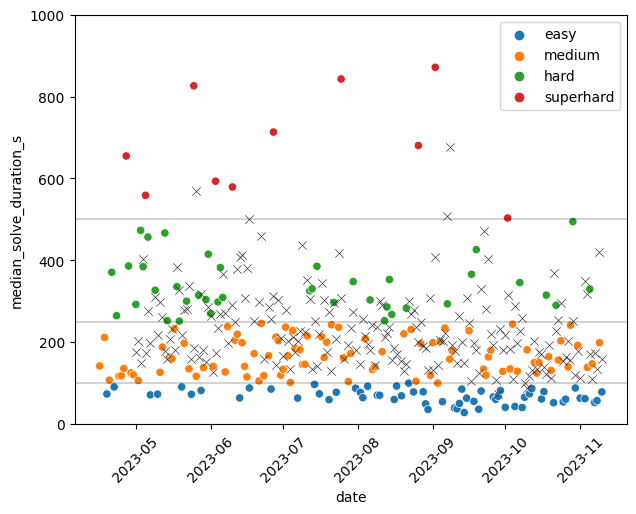

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');